CRIM: 城镇人均犯罪率                                                          AGE: 1940年之前建成的自用房屋比例

ZN：住宅用地超过 25000 sq.ft. 的比例                             DIS：到波士顿5个中心区域的加权距离

INDUS: 城镇非零售商用土地的比例                                    RAD: 辐射性公路的靠近指数

CHAS: 边界是河流为1，否则0                                            TAX: 每10000美元的全值财产税率

NOX: 一氧化氮浓度                                                               PTRATIO: 城镇师生比例         

RM: 住宅平均房间数                                                             LSTAT: 人口中地位低下者的比例
                                                                                                 MEDV: 自住房的平均房价，单位：千美元

# 数据读取

## 导入相关库

In [40]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle


## 通过Pandas导入数据

In [41]:
# 读取数据文件

df = pd.read_csv("data/boston.csv", header=0)

#显示数据摘要描述信息

print (df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

## 载入本示例所需数据

In [42]:
# 获取df的值
df = df.values
print(df)

# 把 df 转换为 np 的数组格式
df = np.array(df)
print(df)


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


## 特征数据归一化

In [43]:
# 对特征数据 【0到11】列 做（0-1）归一化
for i in range(12):
    df[:,i]=df[:,i]/(df[:,i].max()-df[:,i].min())
    
# x_data 为 归一化后的前12列特征数据
x_data = df[:,:12] 

# y_data 为最后1列标签数据
y_data = df[:,12]

# 构建模型

## 定义训练数据占位符

In [44]:
x = tf.placeholder(tf.float32, [None, 12], name="X")  # 12个特征数据（12列）
y = tf.placeholder(tf.float32, [None, 1], name="Y")  # 1个标签数据（1列）

# shape中 None 表示行的数量未知，在实际训练时决定一次代入多少行样本，从一个样本的随机SDG到批量SDG都可以。


## 定义模型结构

In [45]:
# 定义了一个命名空间

with tf.name_scope("Model"):
    # w 初始化值为shape=(12,1)的随机数
    w = tf.Variable(tf.random_normal([12, 1], stddev=0.01), name="W")

    # b 初始化值为 1.0
    b = tf.Variable(1.0, name="b")

    # w和x是矩阵相乘，用matmul,不能用mutiply或者*
    def model(x, w, b):
        return tf.matmul(x, w) + b

    # 预测计算操作，前向计算节点
    pred = model(x, w, b)


# 训练模型

## 设置训练超参数

In [46]:
# 迭代轮次
train_epochs = 50

# 学习率
learning_rate = 0.01


## 定义均方差损失函数

In [47]:
# 定义损失函数
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y - pred, 2))  # 均方误差


## 创建优化器

In [48]:
# 创建优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)


## 初始化变量

In [49]:
sess = tf.Session()
# 定义初始化变量的操作
init = tf.global_variables_initializer()

sess.run(init)


## 迭代训练

In [50]:
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)
        ys = ys.reshape(1, 1)

        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})

        loss_sum = loss_sum + loss

    # 打乱数据顺序，避免过拟合
    xvalues, yvalues = shuffle(x_data, y_data)

    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum / len(y_data)

    print("epoch=", epoch + 1, "loss=", loss_average, "b=", b0temp, "w=", w0temp)


epoch= 1 loss= 44.345957438490935 b= 3.6135247 w= [[-0.6154957 ]
 [ 1.387394  ]
 [-0.78404534]
 [ 0.49237517]
 [ 2.5149543 ]
 [ 7.173551  ]
 [-0.03697276]
 [ 0.7986218 ]
 [ 0.3830048 ]
 [ 0.31934223]
 [ 2.3083053 ]
 [-4.397251  ]]
epoch= 2 loss= 32.03453621166622 b= 4.001814 w= [[-1.1651964 ]
 [ 1.9685259 ]
 [-1.5131279 ]
 [ 0.84830403]
 [ 2.8893318 ]
 [10.610751  ]
 [-0.80719155]
 [ 0.35869125]
 [ 0.6318317 ]
 [-0.27096385]
 [ 1.1471088 ]
 [-8.113409  ]]
epoch= 3 loss= 27.3377831619409 b= 4.282916 w= [[ -1.6631267 ]
 [  2.18432   ]
 [ -1.962317  ]
 [  1.0588145 ]
 [  3.1690888 ]
 [ 13.206743  ]
 [ -1.1859632 ]
 [ -0.17425825]
 [  0.9384554 ]
 [ -0.77131194]
 [  0.21691674]
 [-10.969372  ]]
epoch= 4 loss= 24.670581722063872 b= 4.504368 w= [[ -2.120519  ]
 [  2.2097263 ]
 [ -2.2385192 ]
 [  1.1541226 ]
 [  3.3519664 ]
 [ 15.196607  ]
 [ -1.3498838 ]
 [ -0.7183343 ]
 [  1.2626868 ]
 [ -1.2025006 ]
 [ -0.51589495]
 [-13.190247  ]]
epoch= 5 loss= 23.103340225302055 b= 4.6932535 w= [[ -2.54

# 进行预测

In [51]:
n = 348  # 指定一条数据来看效果

x_test = x_data[n]

x_test = x_test.reshape(1, 12)
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：%f" % predict)

target = y_data[n]
print("标签值：%f" % target)


预测值：23.972881
标签值：24.500000


# 后续版本改进

## 可视化训练过程中的损失值

In [52]:
loss_list = []  # 用于保存loss值的列表

for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)
        ys = ys.reshape(1, 1)

        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})

        loss_sum = loss_sum + loss

        # loss_list.append(loss) # 每步添加一次

    # 打乱数据顺序
    x_data, y_data = shuffle(x_data, y_data)

    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum / len(y_data)

    loss_list.append(loss)  # 每轮添加一次

    print("epoch=", epoch + 1, "loss=", loss_average, "b=", b0temp, "w=", w0temp)


epoch= 1 loss= 19.634419702426076 b= 12.303105 w= [[-10.038397  ]
 [  1.8313439 ]
 [ -1.071225  ]
 [  0.07032423]
 [ -2.1264913 ]
 [ 22.852781  ]
 [ -0.77750146]
 [ -7.3634295 ]
 [  6.1465836 ]
 [ -5.7942204 ]
 [ -3.124969  ]
 [-20.315525  ]]
epoch= 2 loss= 29.464818620901067 b= 13.414821 w= [[-10.246374  ]
 [  2.6511781 ]
 [ -1.0391417 ]
 [  1.8073922 ]
 [ -1.6715055 ]
 [ 24.169916  ]
 [ -0.32966697]
 [ -7.433868  ]
 [  4.8187876 ]
 [ -6.5248775 ]
 [ -3.4063313 ]
 [-20.225092  ]]
epoch= 3 loss= 27.486169490309507 b= 13.944923 w= [[-10.097223  ]
 [  3.0174267 ]
 [ -0.674309  ]
 [  2.5632226 ]
 [ -1.4380574 ]
 [ 24.59385   ]
 [  0.10977978]
 [ -7.9782414 ]
 [  5.1606774 ]
 [ -6.177266  ]
 [ -3.8307528 ]
 [-19.863764  ]]
epoch= 4 loss= 27.71156108345958 b= 14.427896 w= [[-10.048904  ]
 [  3.2199407 ]
 [ -0.41308057]
 [  3.0046728 ]
 [ -1.453243  ]
 [ 24.834167  ]
 [  0.3148689 ]
 [ -8.450051  ]
 [  4.9444604 ]
 [ -6.300572  ]
 [ -4.2788286 ]
 [-19.742321  ]]
epoch= 5 loss= 27.16491592029

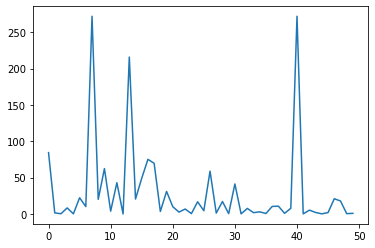

In [53]:
plt.plot(loss_list)

## TensorBoard可视化代码

In [54]:
# 设置日志存储目录
logdir = "./logs/"

# 将计算图存为单独的记录文件
tf.train.write_graph(sess.graph, logdir, "graph.pbtxt")

# 创建记录损失值loss的标量，后面在TensorBoard中SCALARS栏可见
sum_loss_op = tf.summary.scalar("loss", loss_function)

# 把所有需要记录日志的合并，方便一次性写入
merged = tf.summary.merge_all()
